In [ ]:
from datasets import Dataset
from datasets import load_from_disk
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.representation import VisualRepresentation
import pandas as pd
from sklearn.feature_extraction import text

In [1]:
# dataset_name = 'twitter_BC_AB_wildfires_apr-jun2023_5,478(dataset)'
# model_name = 'twitter_BC_AB_wildfires_apr-jun2023_5,478(model)'
# dataset_name = 'ottawa_tornado_2018~10,009(dataset)'
# model_name = 'ottawa_tornado_2018~10,009(model)'
# dataset_name = 'ottawa_storm_2022~9945(dataset)'
# model_name = 'ottawa_storm_2022~9945(model)'
dataset_name = 'NS_wildfire_2023~10,017(dataset)'
model_name = 'NS_wildfire_2023~10,017(model)'


In [5]:
loaded_dataset = load_from_disk(dataset_name)
images = loaded_dataset["image"]#[:25]
docs = loaded_dataset["text"]#[:25]
print(len(docs))

5737


In [64]:
# Additional ways of representing a topic
visual_model = VisualRepresentation()
# Make sure to add the `visual_model` to a dictionary
representation_model = {
   "Visual_Aspect":  visual_model,
}

# BC AB wildfires
#my_stop_words = ['BCwildfire', 'BCwildfires', 'BCfire', 'BCfires', 'ABWildfire', 'ABWildfires', 'ABFire', 'ABFires',
#                 'abfire', 'abwildfires', 'abwildfire', 'abfires', 'abfire', 'bcwildfire']

default_stop_words = text.ENGLISH_STOP_WORDS
#all_stop_words = default_stop_words.union(my_stop_words)

# remove stopwords after embedding
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=default_stop_words) #"english")

topic_model = BERTopic(
    representation_model=representation_model, 
    #verbose=True,
    vectorizer_model = vectorizer_model,
    language = 'english', 
    calculate_probabilities = True,
    nr_topics = 35
    )

In [65]:
topic_model.fit(documents=docs, images=images)

100%|██████████| 35/35 [00:07<00:00,  4.83it/s]


In [66]:
topic_model.save(model_name, serialization="safetensors")

In [3]:
topic_model = BERTopic.load(model_name)

In [34]:
topic_model.merge_topics(docs, images=images, topics_to_merge=[0,2,10])

100%|██████████| 36/36 [00:07<00:00,  4.83it/s]


,Topic,Count,Representation,Visual_Aspect
0,-1,1828,"[wildfires, wildfire, smoke, canada, nsfire, amp, alberta, air, today, wildfire smoke]",
1,0,793,"[alberta, wildfires, smoke, canada, wildfire, sunset, wildfire smoke, morning, canadian, sun]",
2,1,773,"[wildfire, wildfires, amp, home, tips, smoke, air, protect, learn, health]",
3,2,773,"[skwildfire skfires, update detected, wildfire skwildfire, info sk, sk wildfire, cst, cst info, skwildfire, skfires, detected]",
4,3,386,"[nsfire, halifax, novascotia, rain, nsfires, nova, tantallon, scotia, nova scotia, tantallonfire]",
5,4,159,"[lp, red, todays red, wildfire weather, flags, red flags, weather, wildfire, todays, flag]",
6,5,135,"[russia, copernicuseu, data, sentinel2, sentinelhub, processed, siberia, copernicuseu sentinel2, data processed, processed sentinelhub]",
7,6,110,"[acres, new, arizona, new start, wildfire, burn, start, county, sent, new mexico]",
8,7,104,"[water, crews, drone, hotshots, aircraft, wildfire, hotshot, training, aviation, tanker]",
9,8,64,"[800am, 15, burn, burning, permitted, 200pm, daily wildfireseason, 2pm daily, burning permitted, updated 2pm]",

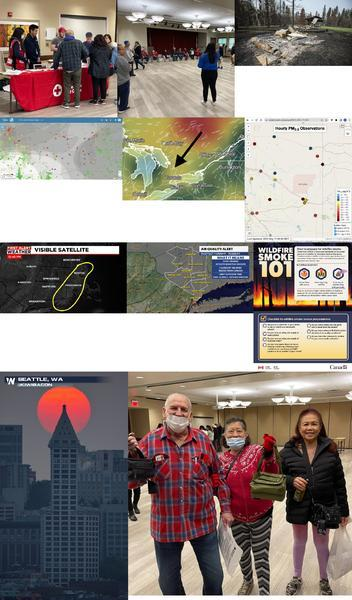
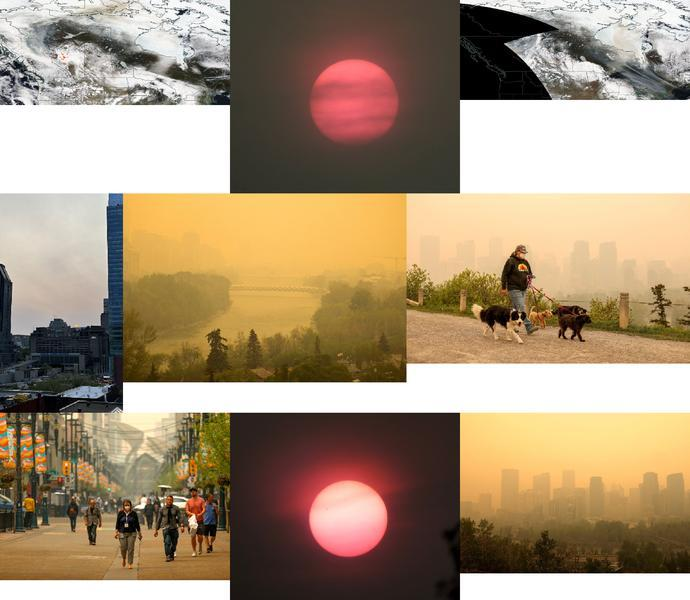
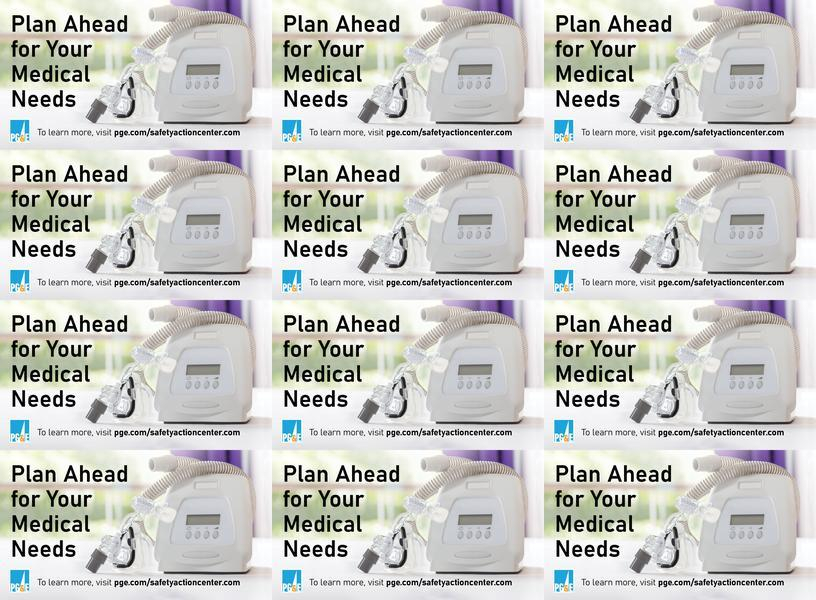
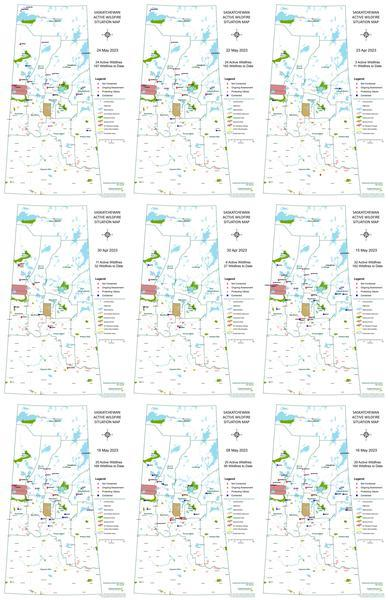
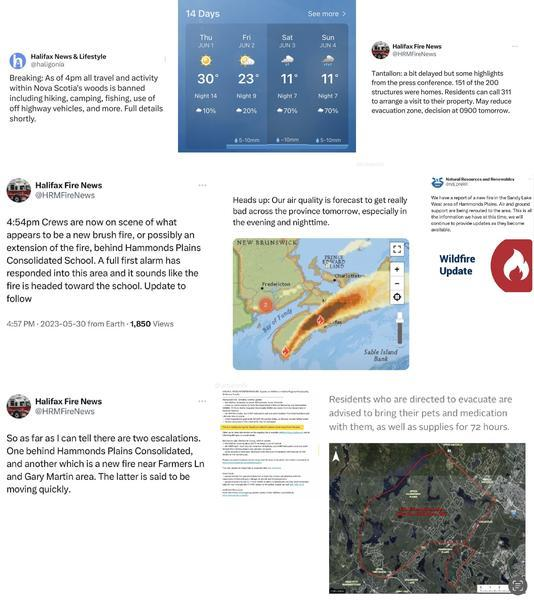
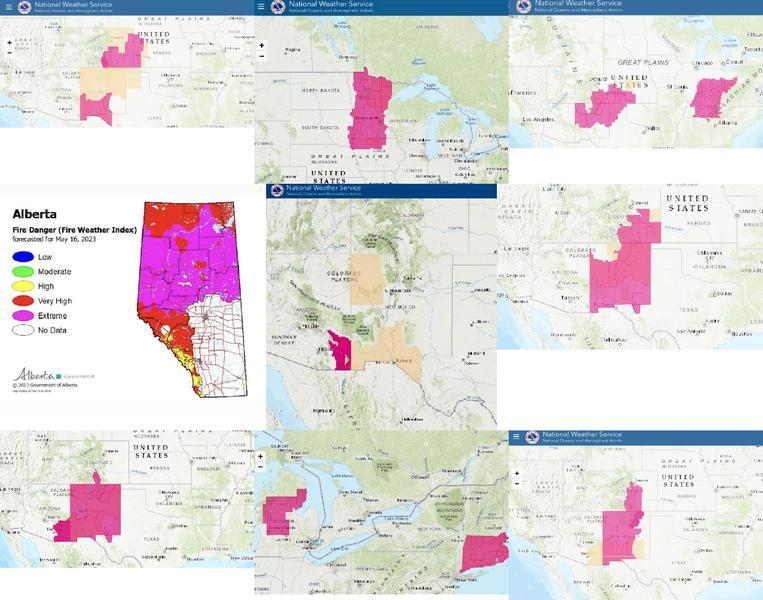
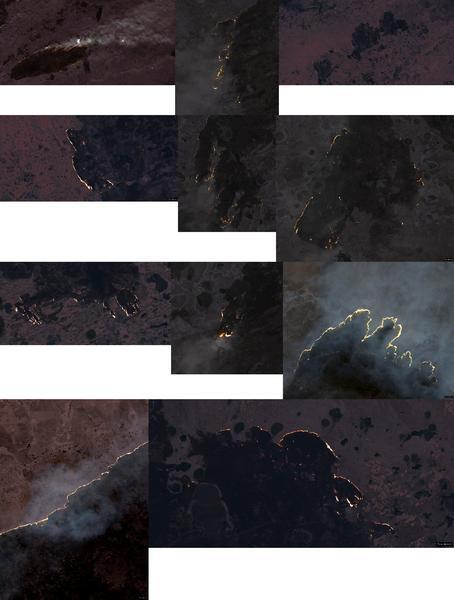
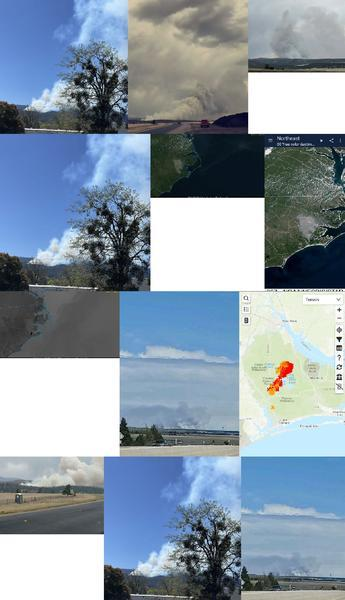
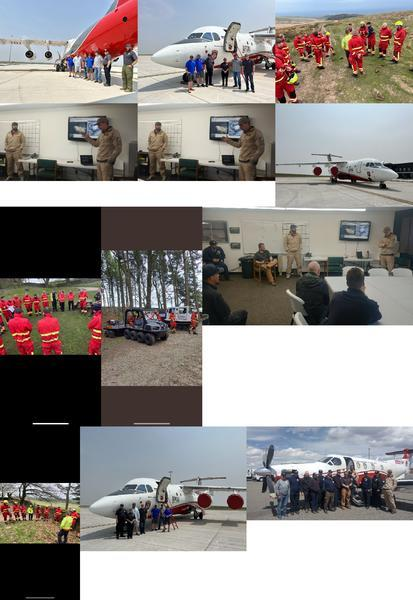
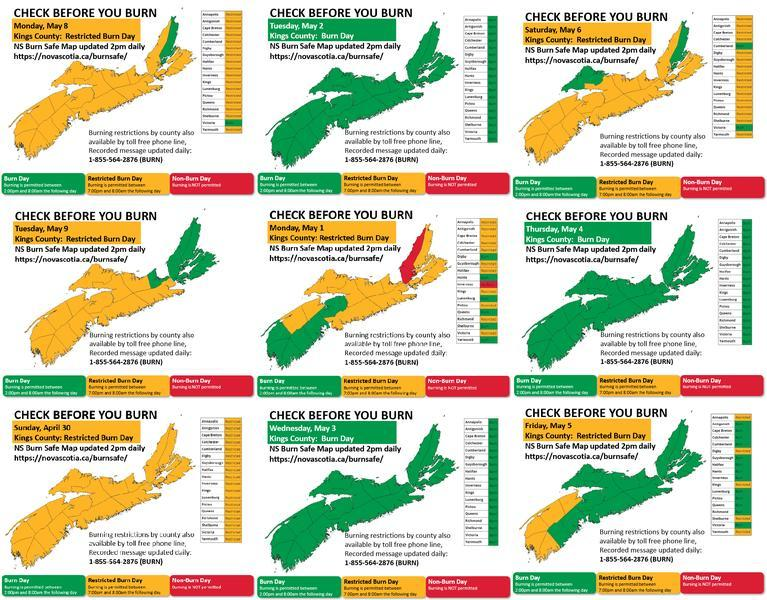
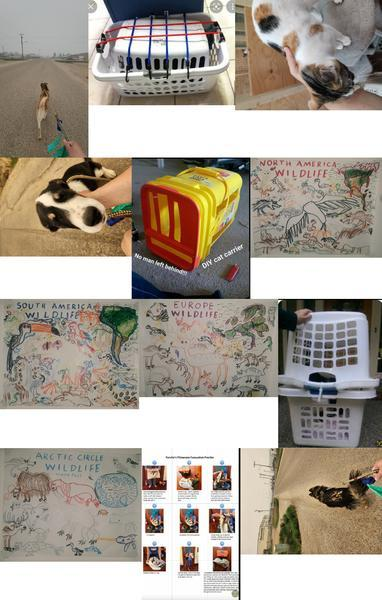
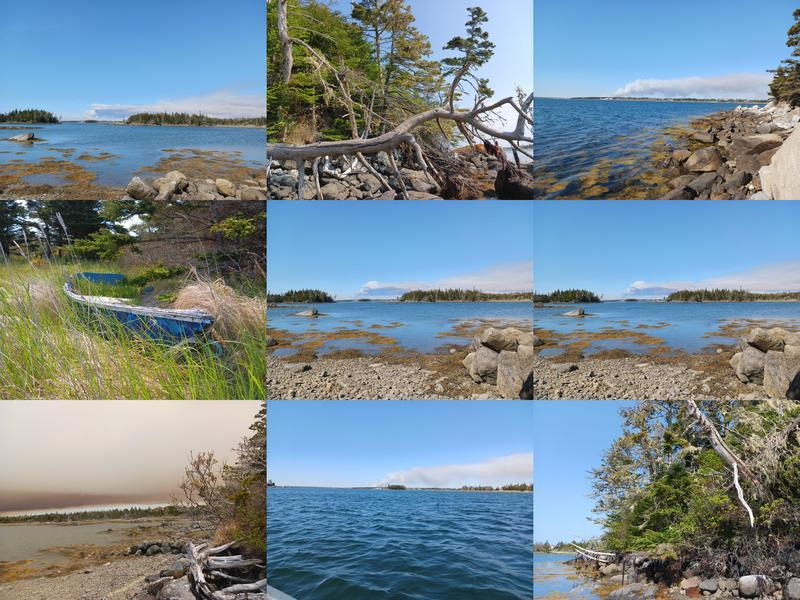
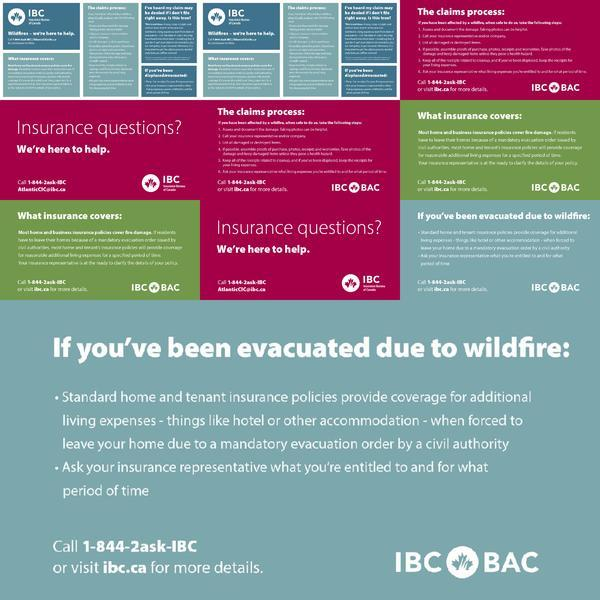
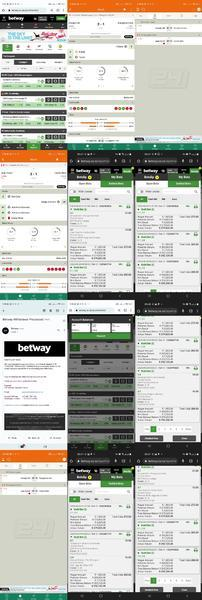
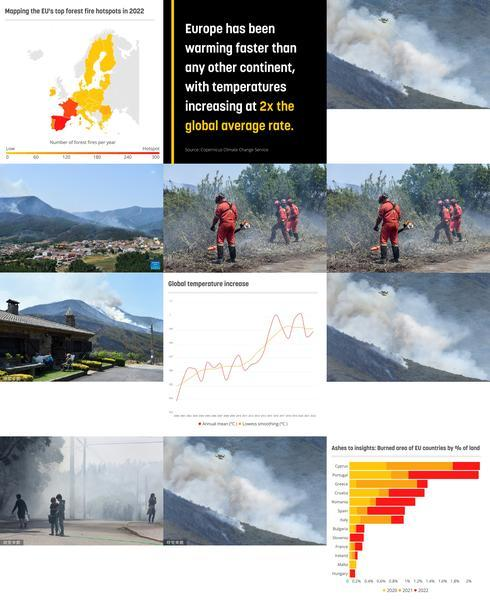
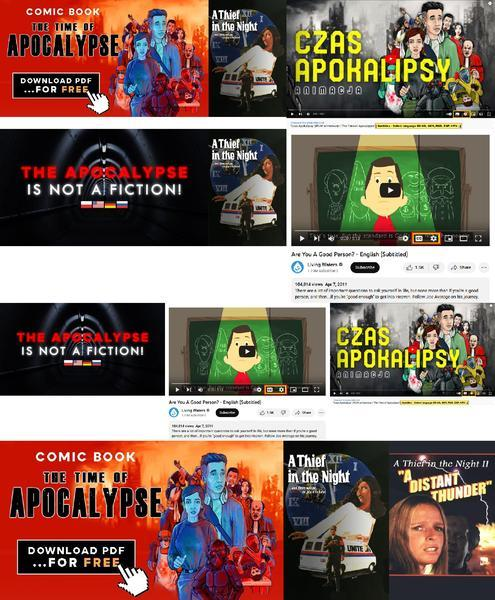
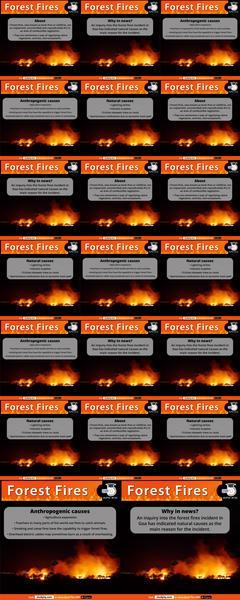
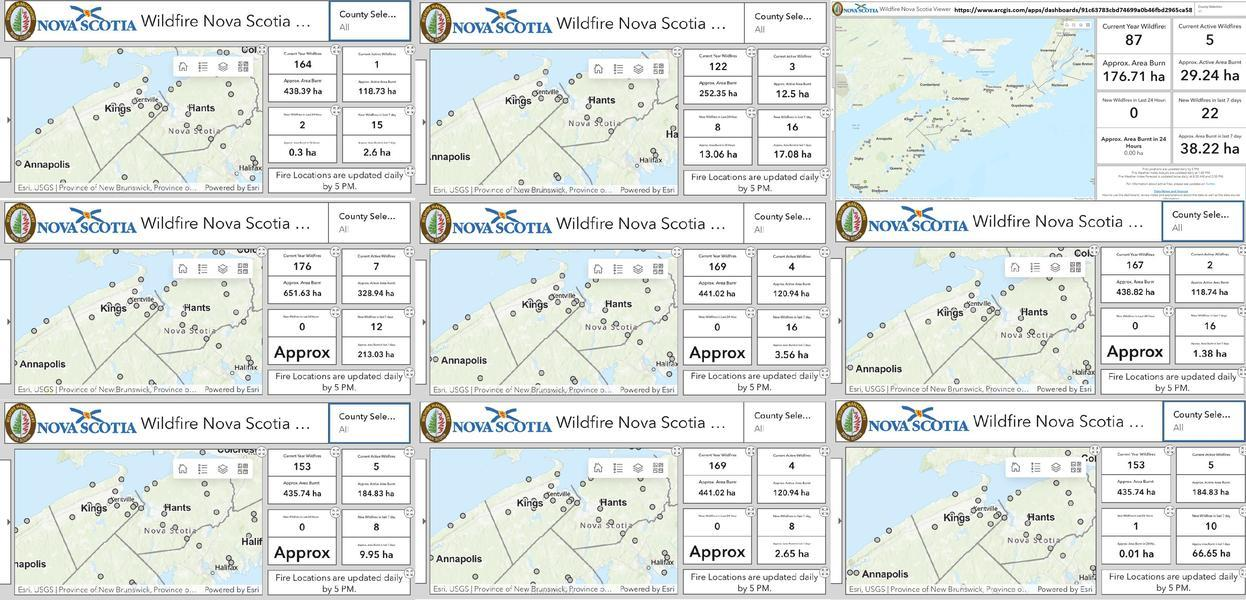
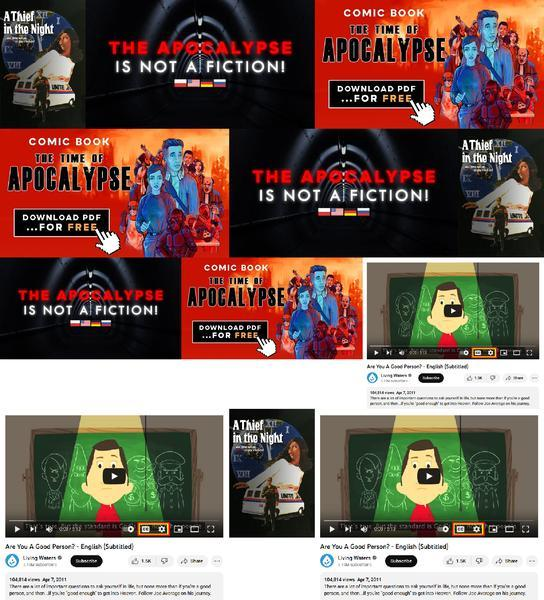
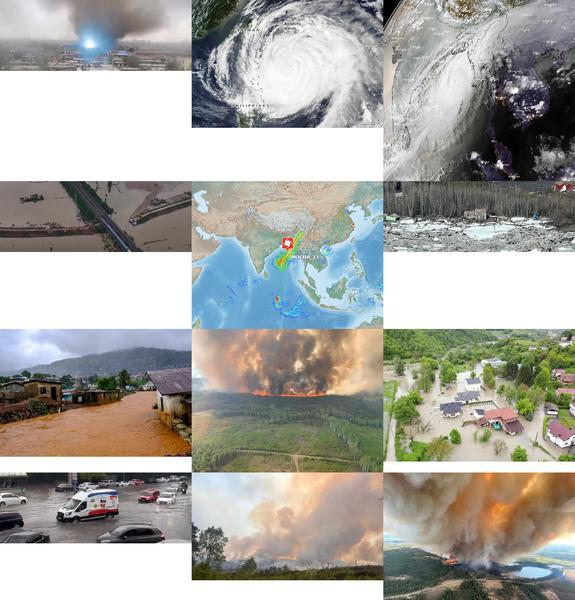
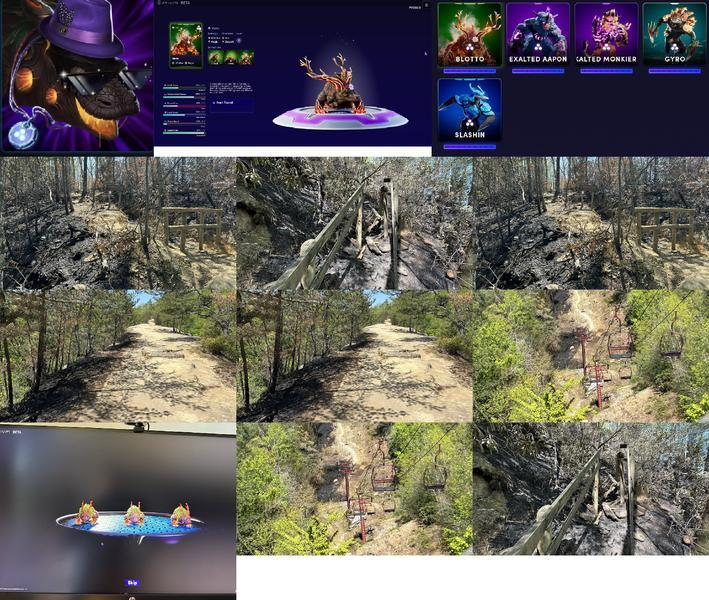
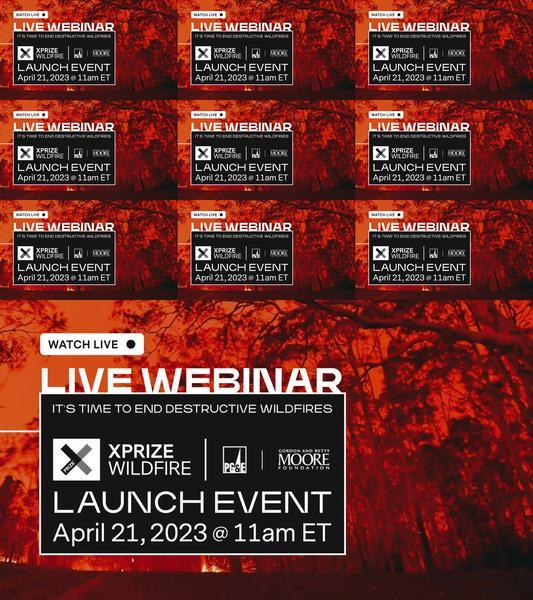
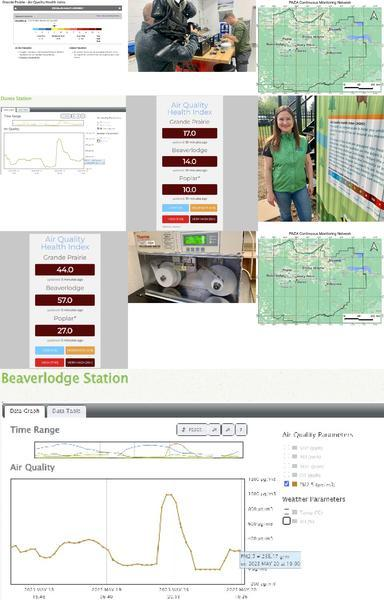
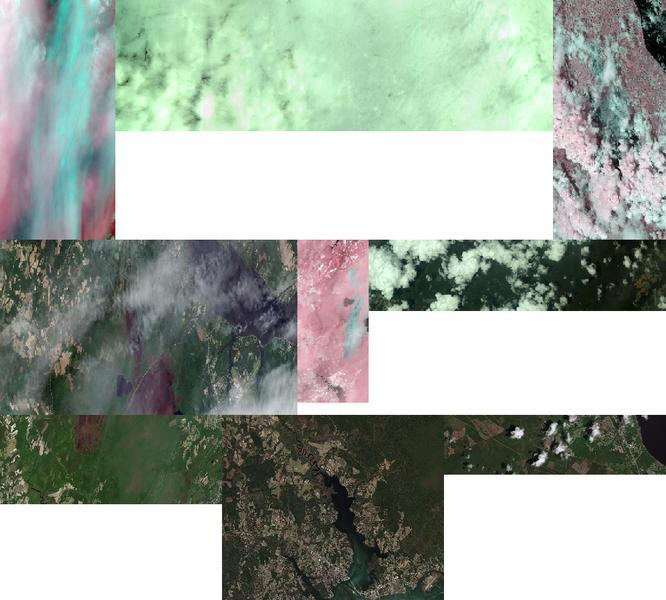
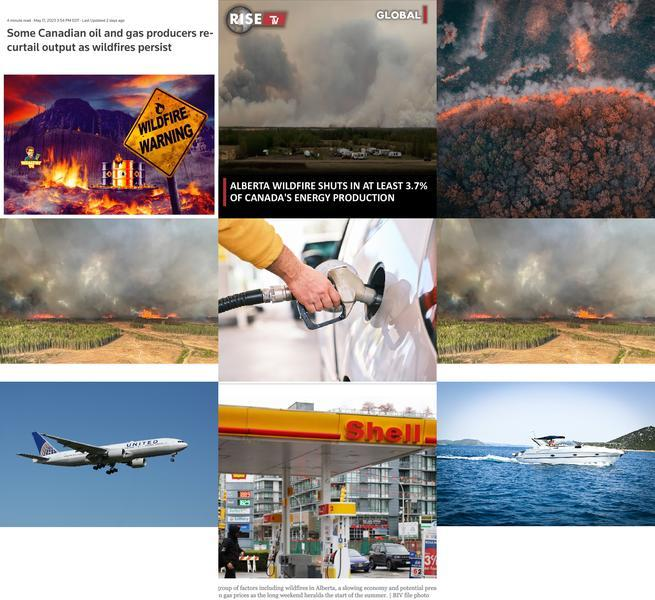
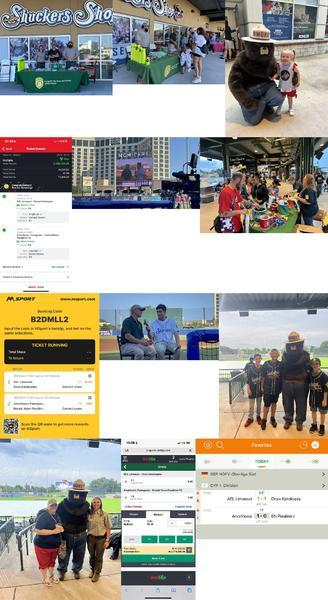
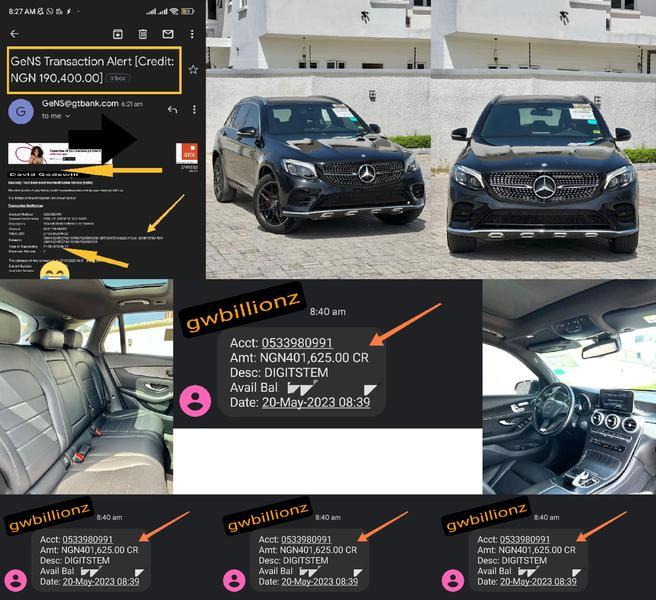
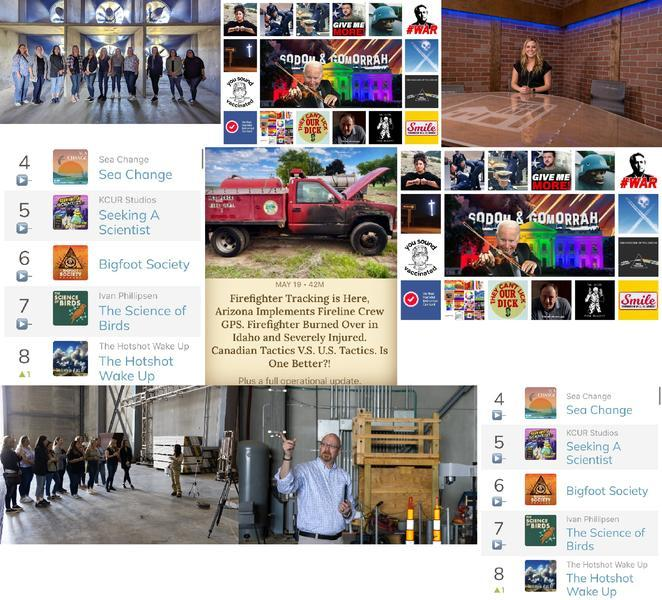
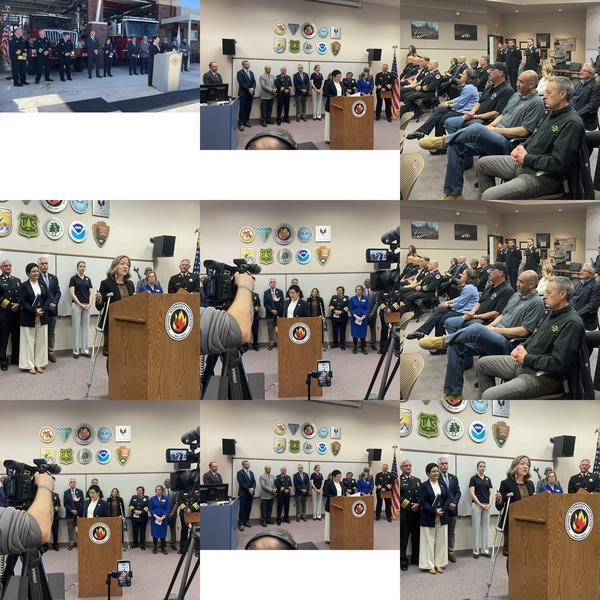
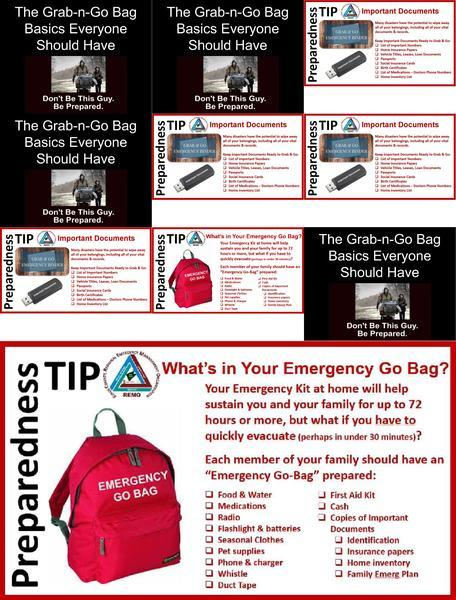
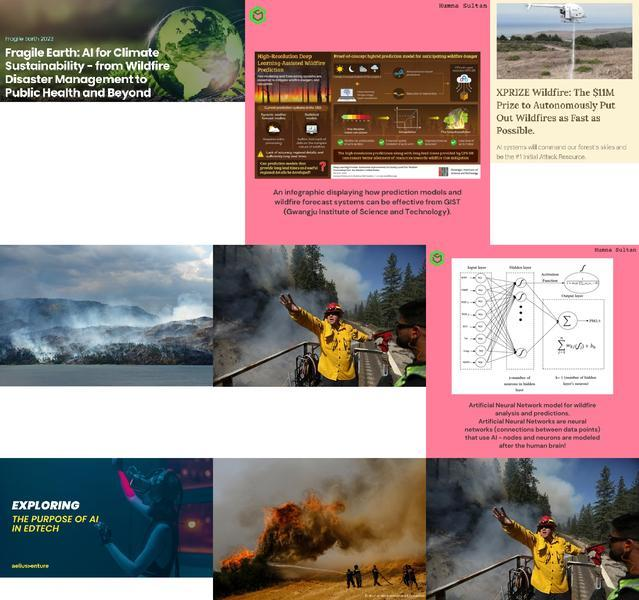
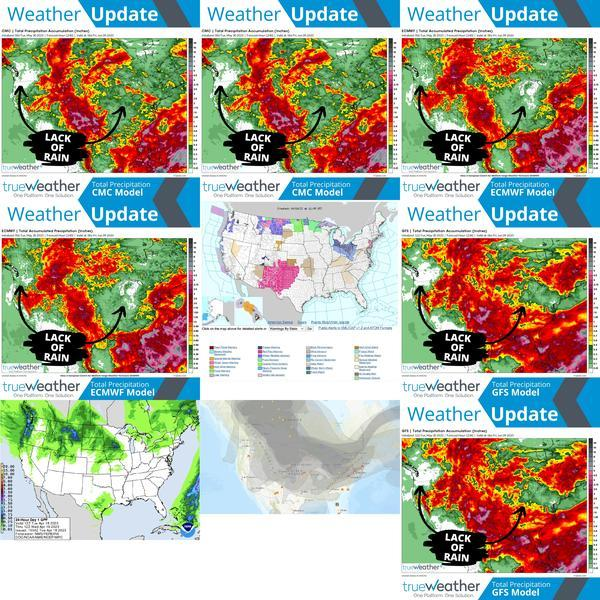
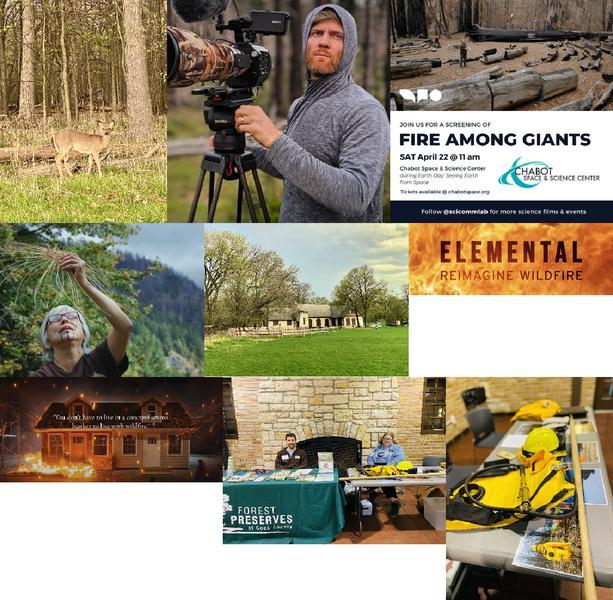
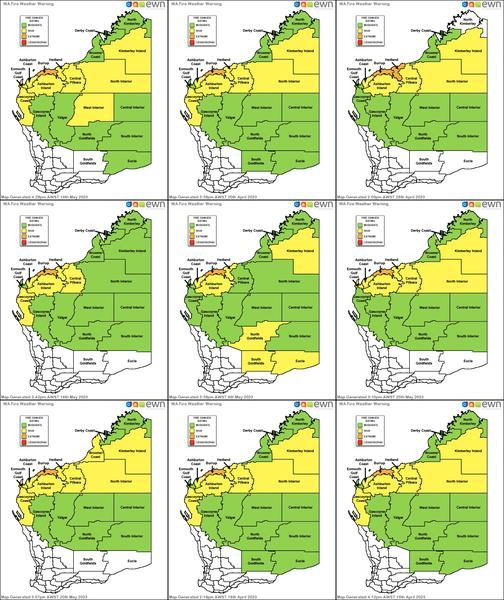
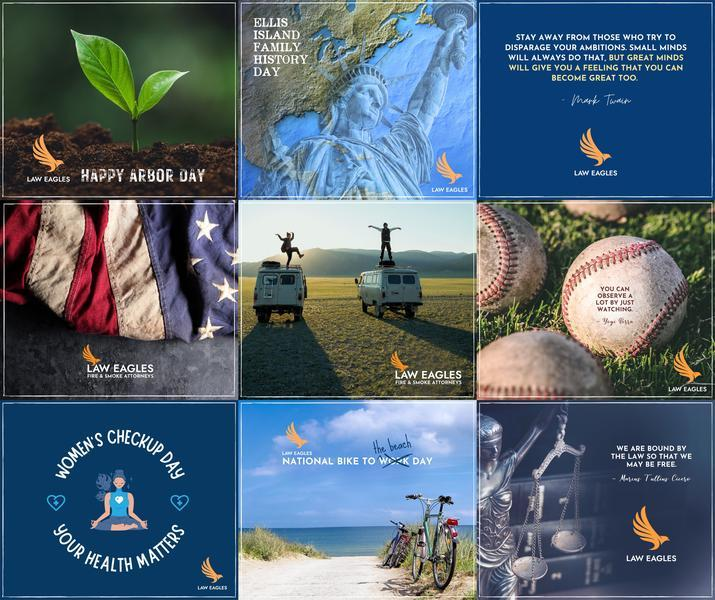

In [4]:
import base64
from io import BytesIO
from IPython.display import HTML
from PIL import Image

def get_thumbnail(image_path, size=(100, 100)):
    try:
        im = Image.open(image_path)
        im.thumbnail(size)
        return im
    except Exception as e:
        print(f"Error generating thumbnail: {str(e)}")
        return None

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

# Extract dataframe
df = topic_model.get_topic_info().drop("Representative_Docs", 1).drop("Name", 1)

# Visualize the images
HTML(df.to_html(formatters={'Visual_Aspect': image_formatter}, escape=False))

In [ ]:
topic_model.get_topics()

In [ ]:
topic_model.visualize_barchart()

In [65]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topic_info()

In [ ]:
topic_model.visualize_hierarchy()